# An Investigation of Sorting Algorithms

## Libraries

In [1]:
import numpy as np # For randomly generating numbers
import pandas as pd #For reading csv files, generating dataframes and plots for same
import time

## Introduction

<b>A sorting algorithm arranges a list of items in some predetermined order.</b> 

When dealing with strings, this may involve sorting elements in alphabethical order. For this investigation, I'm going to look at ordering discrete numerical elements, in ascending order, for smallest to biggest. Sorting is essentially a permutation of list elements, and does not alter any of the elements in the list. 

Much of early computing advancements focused on finding effective sorting methods. This is because sorting elements allow for a number of tasks to be completed quicker than in a list of unsorted items. It's essential in data analysis, when determining the maximum, minimum, median and inter-quartile range. Also, sorting is often pre-processing step in search algorithms, allowing for more effective identification of specific or duplicate entries.

**Terminology**

* The **worst - case scenario** refers to an input that will result in the longest possible running time. In the case of sorting algorithms, this will often refer to an input that is in reverse order. 


* With respect to duplicate entries, a **stable sorting algorithm** will preserve the order of duplicate entries while an **unstable sorting algorithm** will not. All of the sorting algorithms I've chosen to investigate are stable sorting algorithms.


* An **in-place sorting algorithm** uses a fixed additional amount of working space, and is independent of it's input size. Another definition of an in-place algorithm states that the input is usually overwritten by the output.


** Project Intentions **

In the course of this investigation, I will discuss and benchmark the following sorting algorithms:
* Bubble Sort
* Binary Insertion Sort
* Merge Sort
* Bucket Sort
* Tim Sort

I have chosen these sorting algorithms as they include examples of simple and effective comparison based sorting algorithms, non-comparison based sorting algorithms and hybrid sorting algorithms. My decision to examine Binary Insertion Sort, was in part due to the improved time complexity of this algorithm, when compared to the traditional Insertion Sort. It also made sense to examine this variation of Insertion Sort, as it is necessary to run TimSort. 

I will discuss these types of sortings algorithms with reference to the specific examples I have chosen, and plot their running time against the size of inputs. To more effectively compare these algorithms, I will also run each algorithm ten times for each input, and determine the average running time.

**Considerations:**

**Time Complexity and Big O Notation**

When benchmarking algorithms, we are often concerned with how long it takes a function to execute. This is a complex question to answer and the answer varies considerabily based on the input size, and the specification of the machine running the program. 

Time Complexity is a way we can measure how the execution time increases as the input sizes increases. It can be most simplistically described as a function which models the execution time, given incrementally increasing input sizes. However in most instances, inputs with the same size can have different execution times.

As a result we may need to consider the worst case, best case and average case complexities to fully understand the limitations of an algorithm. 

Big O notation is a mathematical notation used to classify algorithms based on their worst case time complexity. 
* $O(n)$ describes an algorithm whose time complexity increases linearly and is proportionate to its input size. 
* $O(n^2)$ describes an algorithm whose time complexity is best modelled by a quadratic function. It is common in algorithms featuring nested iterations through a dataset. 
*  $O(log {}n)$


**Space Complexity**

## Functions
### Generating Random Data

In [2]:
#Function used to generate random data
def rand(n):
    array = []
    for i in range(0, n, 1): # for every integer between 1 and n
        gen_rand= np.random.randint(0, 100) # generate a random number
        array.append(gen_rand) # and add it to the array
    return array

### Benchmarking Functions

In [3]:
#Inputs each random array to each function ONLY ONCE
#Returns running time in milliseconds
def compare_all():
    array_1 = []    
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertionSort, mergeSort, bucketSort, timSort]
    
    for func in functions: #For every function
        for i in rand_size: #For every input size i
                size = rand(i) #generate a random array of i values
                start = time.time()
                func(size) #pass the array to the function
                end = time.time()
                clock = round(((end - start)*1000), 3) #calculate running time in milliseconds
                array_1.append(clock) #Add running time value to array_1

    df = pd.DataFrame({'Input Size': rand_size, 'BubbleSort': array_1[slice(0, 10, 1)], 
                       'InsertionSort': array_1[slice(10, 20, 1)], 'MergeSort': array_1[slice(20, 30, 1)], 
                             'BucketSort':array_1[slice(30, 40, 1)], 'TimSort':array_1[slice(40, 50, 1)]})
    
    df.to_csv("data/run_once.csv", index=False)

In [4]:
#Input an array with 100 values
#Returns the mean of every 10 values, as an array
def mean_array(the_array):
    average_time = []
    y1 = np.mean(the_array[slice(0, 10, 1)])
    y2 = np.mean(the_array[slice(10, 20, 1)])
    y3 = np.mean(the_array[slice(20, 30, 1)])
    y4 = np.mean(the_array[slice(30, 40, 1)])
    y5 = np.mean(the_array[slice(40, 50, 1)])
    y6 = np.mean(the_array[slice(50, 60, 1)])
    y7 = np.mean(the_array[slice(60, 70, 1)])
    y8 = np.mean(the_array[slice(70, 80, 1)])
    y9 = np.mean(the_array[slice(80, 90, 1)])
    y10 =np.mean(the_array[slice(90, 100, 1)])
    
    results = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
    return results

In [5]:
#Inputs each random array to each function ten times
#Returns average running time in milliseconds
def bench_ten_runs():
    results=[]
    average_time = []
    final_array= []
    num_runs = 10
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertionSort, mergeSort, bucketSort, timSort]
    
  
    for func in functions: #For each function
        for i in rand_size: #input a value
            size = rand(i) 
            for r in range(num_runs):#ten times
                start = time.time()
                func(size) 
                end = time.time()
                clock = (end - start)*1000
                results.append(clock)  # Add time elapsed to array results
        average_time = mean_array(results) # Find average time, for each i in rand_size, using mean_array()
        average_time = np.round(average_time, 3) # Round result to 3 dps
        final_array.append(average_time) # Append to final_array
        average_time = [] #set both average_time
        results=[]  #and results to [], before passing through the next function
        
    df4 = pd.DataFrame({'Input Size': rand_size, 'BubbleSort': final_array[0], 
                       'InsertionSort': final_array[1], 'MergeSort': final_array[2], 
                             'BucketSort':final_array[3], 'TimSort':final_array[4]})
    
    df4.to_csv("data/avg_ten_runs.csv", index=False)

## Discussion of Sorting Algorithms

### Bubble Sort

Bubble Sort is a simple comparison based sorting algorithm. It compares every number to it's adjacent number(s), and returns the larger number of the two, in the position with the larger index. It continues this process multiple times, looping through the array, until the set is fully sorted. Let's look at an example.

<img src="https://www.w3resource.com/w3r_images/bubble-short.png" style="width: 600px;" />

In the example above, it could be argued that the list of five numbers was already partially sorted before the algorithm was run. The largest value 8 has the largest index. In the first pass, my algorithm compares four pairs of numbers, or $(n-1)$ values, swapping where necessary. As a result, the second largest number ends up in the second last position. 

In this case, it takes 3 passes to sort the input. However in the worse case scenario, it would take $(n-1)$ passes. 

So in the worst case scenario, my algorithm would compare $(n-1)$ pairs of numbers, $(n-1)$ times.  

This means that the number of operations the algorithm performs would be approximated by $(n-1)(n-1)$, giving us a $O(n^2)$ time complexity. I expect that in small sets BubbleSort will work very well, but with larger input sizes it will take considerably longer to run. 

BubbleSort can be modified to stop early if it finds that the list has become sorted, and in that case it could have a running time of $O(n)$. However that is the best case scenario, where the input is almost sorted list. 

In [6]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1): 
        for i in range(passnum): #Goes through a list from last value to first
            if alist[i]>alist[i+1]: # Compares every value to value on its left
                temp = alist[i]  
                alist[i] = alist[i+1] 
                alist[i+1] = temp #Swaps two values, if needed, so the larger value has the larger index                
# Reference: interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html, accessed 13th April 2019.



Bubble sort is a stable sort with a space complexity of $O(1)$.

In [80]:
mylist = rand(10)
mylist

[87, 58, 51, 97, 67, 85, 6, 76, 84, 95]

In [81]:
bubbleSort(mylist)

In [82]:
mylist

[6, 51, 58, 67, 76, 84, 85, 87, 95, 97]

In [8]:
start =time.time()
bubbleSort(rand(10)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

1.0

In [9]:
start =time.time()
bubbleSort(rand(10000)) #10,000
end = time.time()
np.round((end - start)* 1000, 3)

28333.194

### Insertion Sort vs. Binary Insertion Sort

Insertion Sort takes an unsorted list and compares every element to every element preceding it. In my example below, the first comparison occurs when I compare the second element, 7, with the first element 9. 7 is less than 9, so we swap them. Then we are comparising the element at index 3 to all the preceeding elements. 6 is less than both 9 and 7 so it is moved to index 1. 

<img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/insertion_sort-recursion.png" style="width: 300px;" />

So this sorting algorithm makes $(1 + 2 + 3 + 4 + 5 + 6 + ... + n-1)$ comparisons, and in the worst case, it will also complete $(n-1)$ swaps. This implies that the function will have $O(n^2)$ time complexity, similar to BubbleSort. This is also implied by the structure of the algorithm, which contained two nested loops below. 

In [76]:
def insertion_sort(alist):
    for index in range(1,len(alist)):
        currentvalue = alist[index]
        position = index

        while position>0 and alist[position-1]>currentvalue:
            alist[position]=alist[position-1]
            position = position-1

            alist[position]=currentvalue

In [77]:
mylist = rand(10)
mylist

[26, 56, 11, 87, 45, 92, 59, 40, 84, 28]

In [78]:
insertion_sort(mylist)

In [79]:
mylist

[11, 26, 28, 40, 45, 56, 59, 84, 87, 92]

stable, in place and works well on small sets and on sets that are almost fully sorted 

very inefficient for large random sets 

iterative

In normal insertion sort, it takes O(n) comparisons(at nth iteration) in worst case. We can reduce it to O(log n) by using binary search.



In [10]:
def binary_search(the_array, item, start, end):
    if start == end:
        if the_array[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = round((start + end)/ 2) #Returns the mean of the range of indices 
    
    # determine which side to search
    if the_array[mid] < item:
        return binary_search(the_array, item, mid + 1, end) # search array of indices above mid

    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1) # search array of indices above mid

    else:
        return mid # Otherwise mid = item, so return mid

In [92]:
def insertionSort(the_array):
        
    l = len(the_array) #set l to the number of values in array
    for index in range(1, l): #for every index
        value = the_array[index] #set value
        pos = binary_search(the_array, value, 0, index - 1) 
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    return the_array

#Reference:http://interactivepython.org/courselib/static/pythonds/SortSearch/TheInsertionSort.html, accessed 13th April 2019.
#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [93]:
mylist = rand(10)
mylist

[70, 38, 86, 27, 12, 27, 99, 2, 79, 0]

In [94]:
insertionSort(mylist)

[0, 2, 12, 27, 27, 38, 70, 79, 86, 99]

In [12]:
%timeit(insertionSort)

79.4 ns ± 14.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
start =time.time()
insertionSort(rand(10)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [14]:
start =time.time()
insertionSort(rand(10000)) #10,000 random variables
end = time.time()
np.round((end - start)* 1000, 3)

3027.771

### Merge Sort

<img src="https://www.w3schools.in/wp-content/uploads/2016/09/Merge-Sort-Technique-1.png" style="width: 400px;" />

In [15]:
def mergeSort(alist):

    if len(alist)>1:
        mid = len(alist)//2 #get value of middle index
        lefthalf = alist[:mid] #lower subarray is below mid
        righthalf = alist[mid:] #upper subarray is above mid

        mergeSort(lefthalf) 
        mergeSort(righthalf) #Pass both subarrays back into merge sort

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1 
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1 
        
            
#Reference: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html, accessed 13th April 2019.

In [95]:
mylist = rand(10)
mylist

[19, 59, 57, 84, 54, 84, 95, 89, 31, 35]

In [96]:
mergeSort(mylist)

In [97]:
mylist

[19, 31, 35, 54, 57, 59, 84, 84, 89, 95]

In [16]:
%timeit(mergeSort)

69.2 ns ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [17]:
start =time.time()
mergeSort(rand(10)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

1.001

In [18]:
start =time.time()
mergeSort(rand(10000)) #10,000 random variables
end = time.time()

np.round((end - start)* 1000, 3)

245.064

In [19]:
start =time.time()
mergeSort(rand(100000))
end = time.time()

np.round((end - start)* 1000, 3)

2978.755

### Bucket Sort

Given a list of numbers, $29, 25, 3, 49, 9, 37, 21, 43$

<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e3/Bucket_sort_2.svg" style="width: 400px;" />

Bucket sort is a stable sort which works by distributing the elements of an array into a series of buckets. Each bucket is then sorted individually, wither using a different sorting algorithm or by recursively applying the Buketsort algorithm. 

Time coplexity is n^2 in the worst case, and n+k in the besta and average, where k is the number of buckets. 
Worst case space complexity is O(nk)

buckets sorts performance degrades with clustering if many values occur close tgether they wil fall in to a single buckets and be sorted slowly

**WIKI says**

Bucket sort is a divide and conquer sorting algorithm that generalizes counting sort by partitioning an array into a finite number of buckets. Each bucket is then sorted individually, either using a different sorting algorithm, or by recursively applying the bucket sorting algorithm.

A bucket sort works best when the elements of the data set are evenly distributed across all buckets.

In [101]:
def bucketSort(alist):
    largest = max(alist) #Set max
    length = len(alist) #Set input size = length
    size = largest/length #Divide max by len to get size
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertionSort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
    return result

#Reference: https://www.sanfoundry.com/python-program-implement-bucket-sort/, accessed 13th April 2019.

In [102]:
mylist = rand(10)
mylist

[51, 40, 48, 1, 42, 78, 5, 45, 63, 1]

In [103]:
bucketSort(mylist)

[1, 5, 1, 40, 42, 45, 51, 48, 63, 78]

In [21]:
%timeit(bucketSort)

77.2 ns ± 14.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [22]:
start =time.time()
bucketSort(rand(10))
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [23]:
start =time.time()
bucketSort(rand(100000))
end = time.time()

np.round((end - start)* 1000, 3)

68262.338

### TimSort

**WIKI SAYS**
Timsort is a hybrid stable sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data.

The algorithm finds subsequences of the data that are already ordered, and uses that knowledge to sort the remainder more efficiently. This is done by merging an identified subsequence, called a run, with existing runs until certain criteria are fulfilled. Timsort has been Python's standard sorting algorithm since version 2.3. 

In [24]:
def merge(left, right): #Input is two sorted lists
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [155]:
def timSort(the_array):
 
    runs, sorted_runs = [], []
    length = len(the_array)
    new_run = [the_array[0]]

    # for every i in the range of 1 to length of array
    for i in range(1, length):
        # if i is at the end of the list
        if i == length - 1:
            new_run.append(the_array[i])
            runs.append(new_run)
            break
        # if the i'th element of the array is less than the one before it
        if the_array[i] < the_array[i-1]:
            # if new_run is set to None (NULL)
            if not new_run:
                runs.append([the_array[i]])
                new_run.append(the_array[i])
            else:
                runs.append(new_run)
                new_run = []
        # else if its equal to or more than
        else:
            new_run.append(the_array[i])

    # for every item in runs, append it using insertion sort
    for item in runs:
        sorted_runs.append(insertionSort(item))
    
    # for every run in sorted_runs, merge them
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)
    
    return sorted_array

#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [156]:
mylist = rand(10)
mylist

[99, 72, 91, 27, 37, 32, 26, 34, 66, 30]

In [157]:
timSort(mylist)

[26, 26, 30, 34, 37, 66, 91, 99]

In [26]:
%timeit(timSort)

71.9 ns ± 12 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [27]:
start =time.time()
timSort(rand(100000))
end = time.time()
np.round((end - start)* 1000, 3)

861.219

## Comparing Sorting Algorithms 

In [37]:
compare_all()

In [38]:
df = pd.read_csv('data/run_once.csv')
df

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.000,0.000,0.000,0.000
1,50,0.000,0.000,0.000,0.000,0.000
2,100,2.002,1.001,0.998,1.001,0.000
3,250,13.003,6.001,2.001,1.000,0.000
4,500,109.026,11.002,5.002,5.999,1.001
5,750,294.075,22.006,7.002,5.002,2.999
6,1000,565.139,36.007,10.002,8.003,1.001
7,5000,8944.272,561.143,67.014,114.032,14.006
8,7500,18327.654,1426.363,115.028,302.078,17.005
9,10000,30550.760,2193.555,128.032,449.113,33.008


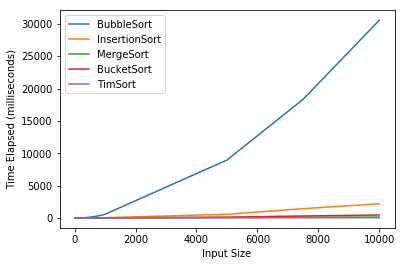

In [39]:
ax = df.plot(x='Input Size', y=['BubbleSort', 'InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

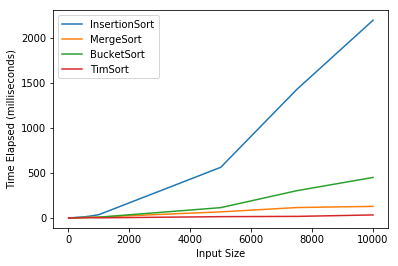

In [40]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

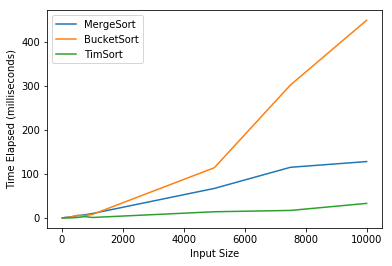

In [41]:
ax = df.plot(x='Input Size', y=['MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## Benchmarking Sorting Algorithms

In [33]:
bench_ten_runs()

In [34]:
df2 = pd.read_csv('data/avg_ten_runs.csv')
df2

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.000,0.000,0.100,0.100
1,50,0.500,0.400,0.200,0.100,0.100
2,100,1.000,1.000,0.500,0.300,0.200
3,250,10.102,3.801,1.800,1.400,0.500
4,500,29.708,9.802,4.101,3.301,1.300
5,750,56.714,18.605,6.602,10.003,2.101
6,1000,107.627,28.908,9.202,10.303,2.001
7,5000,8994.273,481.022,57.315,227.458,12.203
8,7500,7283.064,1168.297,74.219,401.101,17.504
9,10000,12453.363,2071.326,142.836,604.654,37.109


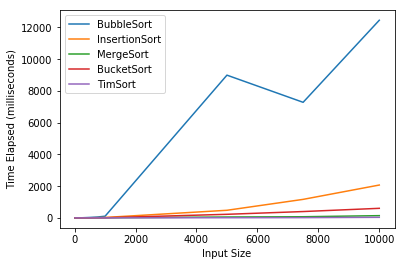

In [35]:
ax = df2.plot(x='Input Size', y=['BubbleSort','InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

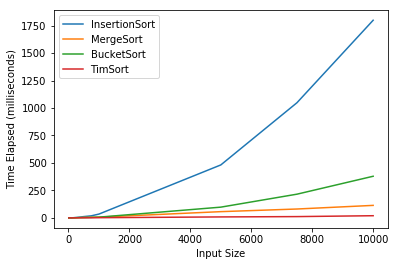

In [36]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## References


#### Documentation
* [The Python Standard Library](https://docs.python.org/3/library/)
> * [Time](https://docs.python.org/3/library/time.html) function, accessed 13th April 2019. 
> * [Reading and Writing CSV files](https://docs.python.org/3/library/csv.html), accessed 13th April 2019.
* [Pandas Documentation]()
> * [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) function, accessed 13th April 2019.
___

#### Wikipedia Pages 
* [In-Place Algorithm](https://en.wikipedia.org/wiki/In-place_algorithm), accessed 25 April 2019.

#### Other 
* [Binary Insertion Sort](https://www.geeksforgeeks.org/binary-insertion-sort/), page on geeksforgeeks.org, accessed 25 April 2019.